# Keras 高阶API

![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200503045434.png)

In [63]:
"""导入所需库"""
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
import matplotlib as mpl
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn
import time
import sys
import os
# 打印TF版本
%matplotlib inline
print("tf.__version__: {}".format(tf.__version__))
print(sys.version)

tf.__version__: 2.2.0-rc3
3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]


## 0.数据预处理

### 数据加载

In [64]:
"""加载数据"""
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]
# 打印维度
print("验证数据: X的维度- {} Y的维度- {}".format(x_valid.shape,y_valid.shape))
print("训练数据: X的维度- {} Y的维度- {}".format(x_train.shape,y_train.shape))
print("测试数据: X的维度- {} Y的维度- {}".format(x_test.shape,y_test.shape))
print("最大值是:{}  最小值是{}".format(np.max(x_train), np.min(x_train)))

验证数据: X的维度- (5000, 28, 28) Y的维度- (5000,)
训练数据: X的维度- (55000, 28, 28) Y的维度- (55000,)
测试数据: X的维度- (10000, 28, 28) Y的维度- (10000,)
最大值是:255  最小值是0


### 归一化处理

In [65]:
"""利用Sklearn进行归一化处理"""
scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
print("最大值是:{}  最小值是{}".format(np.max(x_train_scaled), np.min(x_train_scaled)))

最大值是:2.0231432914733887  最小值是-0.8105136156082153


### 数据可视化

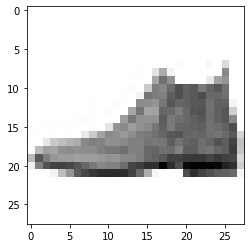

In [0]:
"""可视化数据"""
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.show()
# 可视化第一个数据
show_single_image(x_test[0])

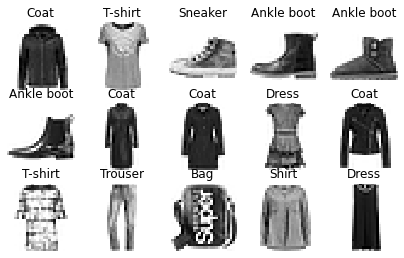

In [0]:

def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    # 执行一些输入数据的判断
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    # 设置图片的大小
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.4))
    # 循环打印图片
    for row in range(n_rows):
        for col in range(n_cols):
            # 对于3*3的矩阵,第一张图片 0*0+0=0
            # 第五张图片 1*3+1=4
            index = n_cols * row + col
            # subplot(nrows, ncols, index, **kwargs)
            plt.subplot(n_rows, n_cols, index+1)
            # interpolation = 'nearest' works well when a small image is scaled up
            plt.imshow(x_data[index], cmap="binary",
                       interpolation = "nearest")
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']
show_imgs(3, 5, x_train, y_train, class_names)

## 1.模型构建

### Sequential构建模型

In [0]:
"""第一种写法"""
# relu: y = max(0, x)
# softmax: 将向量变成概率分布. x = [x1, x2, x3], 
keras.backend.clear_session()
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [0]:
"""第二种写法"""
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [24]:
# 2. 编译模型
# reason for sparse: y->index. y->one_hot->[] 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

# 打印神经网络结构 第一层= [None, 784] 
# x * W + b (W.shape=[784, 300],b=300)
# 第二层= [None, 784]*[784, 300]*[784]+300= 235500
# 第三层= [None, 235500]*[235500,100]*[300]+100= 30100
print(model.summary())

# 3. 训练模型
history = model.fit(x_train_scaled, y_train, epochs=10,
                    batch_size=16, #默认32
                    validation_data=(x_valid_scaled, y_valid))
# 4. 衡量模型
print("history.history的结果:{}".format(history.history))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
3438/3438 [==============================] - 9s 3ms/step - loss: 0.3681 - accuracy: 0.8642 - val_loss: 0.3409 - val_accuracy: 0.8764
Epoch 2/10
3438/3438 [==============================] - 9s 3ms/step - loss: 0.3314 - accuracy: 0.

### 函数式API

模型结构(wide&deep)  
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200425201801.png)
Google Play推荐系统  
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200425202216.png)

In [0]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 加载数据
housing = fetch_california_housing()
x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
# 归一化处理
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

tf.keras.backend.clear_session()

![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200503035144.png)

In [32]:
"""wipe and deep 模型输入都是一样的
函数式API 功能API, 类似复合函数: f(x) = h(g(x))
"""
# 构建deep层
input = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(100, activation='relu')(input)
hidden2 = keras.layers.Dense(100, activation='relu')(hidden1)
# 横向拼接,input(wide) + (input->hidden2)
concat = keras.layers.concatenate([input, hidden2])
# 全部指向output
output = keras.layers.Dense(1)(concat)
# 将模型传给model
model = keras.models.Model(inputs = [input],
                           outputs = [output])
# 打印结构
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 100)          900         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 100)          10100       dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 108)          0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [33]:
# 编译模型
lr = keras.optimizers.SGD(1e-4)
model.compile(loss="mean_squared_error", optimizer=lr)
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]
# 训练模型
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 5,
                    callbacks = callbacks)
# 衡量模型
model.evaluate(x_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 5.1368 - val_loss: 4.2656
Epoch 2/5
363/363 [==============================] - 1s 1ms/step - loss: 3.3410 - val_loss: 2.8354
Epoch 3/5
363/363 [==============================] - 1s 1ms/step - loss: 2.2757 - val_loss: 1.9747
Epoch 4/5
363/363 [==============================] - 1s 1ms/step - loss: 1.6392 - val_loss: 1.4711
Epoch 5/5
162/162 [==============================] - 0s 1ms/step - loss: 1.3662


1.366232991218567

In [34]:
"""输入不同的wide and deep 模型"""
tf.keras.backend.clear_session()
# 设定两个输入的维度大小,一个5,一个6
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_wide, input_deep],
                           outputs = [output])
# 编译模型
model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
______________________________________________________________________________________________

In [35]:
# 把数据切分, 前5个feature为wide, 后6个feature为deep
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]
history = model.fit([x_train_scaled_wide, x_train_scaled_deep],# 训练数据x分为两个部分
                    y_train, # 训练数据y
                    validation_data = (
                        [x_valid_scaled_wide, x_valid_scaled_deep],# 验证数据x分为两个部分
                        y_valid),# 验证数据y
                    epochs = 5,
                    callbacks = callbacks)
# 验证
model.evaluate([x_test_scaled_wide, x_test_scaled_deep], y_test)

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 0.8810 - val_loss: 0.6089
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 0.6190 - val_loss: 0.6046
Epoch 3/5
363/363 [==============================] - 1s 1ms/step - loss: 0.5036 - val_loss: 0.4951
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4536 - val_loss: 0.7392
Epoch 5/5
162/162 [==============================] - 0s 995us/step - loss: 0.4339


0.43394234776496887

In [36]:
"""多输出的模型"""
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
# 第一个输出
output = keras.layers.Dense(1)(concat)
# 第二个输出
output2 = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs = [input_wide, input_deep],
                           outputs = [output, output2]) # 多输出
model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           210         input_4[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           930         dense_3[0][0]                    
____________________________________________________________________________________________

In [37]:
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]
history = model.fit([x_train_scaled_wide, x_train_scaled_deep],
                    [y_train, y_train],
                    validation_data = (
                        [x_valid_scaled_wide, x_valid_scaled_deep],
                        [y_valid, y_valid]),
                    epochs = 5,
                    callbacks = callbacks)
model.evaluate([x_test_scaled_wide, x_test_scaled_deep],[y_test, y_test])

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 1.8718 - dense_5_loss: 0.8358 - dense_6_loss: 1.0359 - val_loss: 1.2121 - val_dense_5_loss: 0.5203 - val_dense_6_loss: 0.6918
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 1.0584 - dense_5_loss: 0.4562 - dense_6_loss: 0.6022 - val_loss: 1.1434 - val_dense_5_loss: 0.5611 - val_dense_6_loss: 0.5823
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.9675 - dense_5_loss: 0.4180 - dense_6_loss: 0.5495 - val_loss: 0.9962 - val_dense_5_loss: 0.4439 - val_dense_6_loss: 0.5523
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.9235 - dense_5_loss: 0.4037 - dense_6_loss: 0.5198 - val_loss: 0.9521 - val_dense_5_loss: 0.4145 - val_dense_6_loss: 0.5377
Epoch 5/5
162/162 [==============================] - 0s 1ms/step - loss: 0.8683 - dense_5_loss: 0.3879 - dense_6_loss: 0.4804


[0.8683187365531921, 0.3878990709781647, 0.4804193377494812]

### model子类API

In [40]:
"""Model子类API"""
tf.keras.backend.clear_session()
class WideDeepModel(keras.models.Model):
    def __init__(self):
        # 重载父类方法
        super(WideDeepModel, self).__init__()
        # 定义模型的层次
        self.hidden1_layer = keras.layers.Dense(30, activation='relu')
        self.hidden1_5_layer = keras.layers.BatchNormalization()
        self.hidden2_layer = keras.layers.Dense(30, activation='relu')
        self.output_layer = keras.layers.Dense(1)
    
    def call(self, input):
        # 完成模型的正向计算
        hidden1 = self.hidden1_layer(input)
        hidden1_5 = self.hidden1_5_layer(hidden1)
        hidden2 = self.hidden2_layer(hidden1_5)
        concat = keras.layers.concatenate([input, hidden2])
        output = self.output_layer(concat)
        return output
# 两种调用模型的方法 model = WideDeepModel()
# model = keras.models.Sequential([WideDeepModel(),])
model = WideDeepModel()
# 构建模型
model.build(input_shape=(None, 8))
# 原版不收敛,更改学习率
lr = keras.optimizers.SGD(1e-3)
model.summary()
model.compile(loss="mean_squared_error", optimizer=lr)
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]

Model: "wide_deep_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  270       
_________________________________________________________________
batch_normalization (BatchNo multiple                  120       
_________________________________________________________________
dense_1 (Dense)              multiple                  930       
_________________________________________________________________
dense_2 (Dense)              multiple                  39        
Total params: 1,359
Trainable params: 1,299
Non-trainable params: 60
_________________________________________________________________


In [41]:
# 模型wide和deep的输入是一样的
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 5,
                    callbacks = callbacks)
# 验证
model.evaluate(x_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 1.3705 - val_loss: 0.8307
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 0.6139 - val_loss: 0.6447
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.5498 - val_loss: 0.6132
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.5313 - val_loss: 0.6171
Epoch 5/5
162/162 [==============================] - 0s 941us/step - loss: 0.6814


0.6814069151878357

### 激活函数

In [0]:
# selu 自带归一化处理 
tf.keras.backend.clear_session()
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="selu")) # 修改为selu激活函数
model.add(keras.layers.Dense(10, activation="softmax"))

In [56]:
# 编译模型
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])
# 保存模型为fashion_mnist_model.h5
logdir = './dnn-selu-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,"fashion_mnist_model.h5")
# 使用fashion_minist训练
history = model.fit(x_train_scaled, y_train, epochs=5,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks = keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3))
# 衡量模型
model.evaluate(x_test_scaled, y_test)

Epoch 1/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5447 - accuracy: 0.8027 - val_loss: 0.4261 - val_accuracy: 0.8510
Epoch 2/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4063 - accuracy: 0.8528 - val_loss: 0.3836 - val_accuracy: 0.8628
Epoch 3/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3615 - accuracy: 0.8663 - val_loss: 0.3799 - val_accuracy: 0.8634
Epoch 4/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3363 - accuracy: 0.8758 - val_loss: 0.3596 - val_accuracy: 0.8692
Epoch 5/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3142 - accuracy: 0.8833 - val_loss: 0.3433 - val_accuracy: 0.8752


### BatchNormalization

In [0]:
tf.keras.backend.clear_session()
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="relu"))
    model.add(keras.layers.BatchNormalization())
    """
    # BatchNormalization有争论
    # 第二种写法
    model.add(keras.layers.Dense(100))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    """
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [75]:
history = model.fit(x_train_scaled, y_train, epochs=5,
                    validation_data=(x_valid_scaled, y_valid))
model.evaluate(x_test_scaled, y_test)

Epoch 1/5
1719/1719 [==============================] - 10s 6ms/step - loss: 1.0721 - accuracy: 0.6194 - val_loss: 0.6646 - val_accuracy: 0.7570
Epoch 2/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7747 - accuracy: 0.7230 - val_loss: 0.5616 - val_accuracy: 0.7974
Epoch 3/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6838 - accuracy: 0.7579 - val_loss: 0.5302 - val_accuracy: 0.8102
Epoch 4/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6259 - accuracy: 0.7788 - val_loss: 0.5052 - val_accuracy: 0.8252
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.5320 - accuracy: 0.8096


[0.5320420265197754, 0.8095999956130981]

### Dropout

In [0]:
# 添加dropout
tf.keras.backend.clear_session()
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="selu"))
model.add(keras.layers.AlphaDropout(rate=0.5))
# AlphaDropout: 1. 均值和方差不变 2. 归一化性质也不变
# model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

Epoch 1/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6947 - accuracy: 0.7642 - val_loss: 0.8199 - val_accuracy: 0.8210
Epoch 2/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4603 - accuracy: 0.8426 - val_loss: 0.5467 - val_accuracy: 0.8678
Epoch 3/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4031 - accuracy: 0.8611 - val_loss: 0.6977 - val_accuracy: 0.8506
Epoch 4/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3727 - accuracy: 0.8684 - val_loss: 0.5483 - val_accuracy: 0.8756
Epoch 5/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3503 - accuracy: 0.8782 - val_loss: 0.4975 - val_accuracy: 0.8762


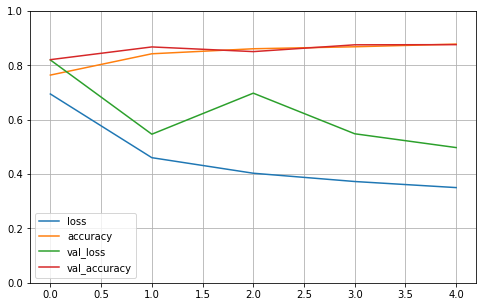

313/313 [==============================] - 1s 2ms/step - loss: 0.5807 - accuracy: 0.8658


[0.580734133720398, 0.8658000230789185]

In [78]:
history = model.fit(x_train_scaled, y_train, epochs=5,
                    validation_data=(x_valid_scaled, y_valid))
plot_learning_curves(history)
model.evaluate(x_test_scaled, y_test)

## 2.编译模型

In [57]:
"""model.compile(optimizer='rmsprop', 
              loss=None, 
              metrics=None, 
              loss_weights=None,
              sample_weight_mode=None, 
              weighted_metrics=None, 
              target_tensors=None,
              distribute=None, 
              **kwargs)
"""

"model.compile(optimizer='rmsprop', \n              loss=None, \n              metrics=None, \n              loss_weights=None,\n              sample_weight_mode=None, \n              weighted_metrics=None, \n              target_tensors=None,\n              distribute=None, \n              **kwargs)\n"

### optimizer

### loss

### metrics

## 3.训练模型

In [58]:
"""fit(x=None, y=None, 
    batch_size=None, 
    epochs=1, 
    verbose=1, 
    callbacks=None,
    validation_split=0.0, 
    validation_data=None, 
    shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None,validation_steps=None, validation_freq=1, max_queue_size=10, workers=1,use_multiprocessing=False, **kwargs)
"""

'fit(x=None, y=None, \n    batch_size=None, \n    epochs=1, \n    verbose=1, \n    callbacks=None,\n    validation_split=0.0, \n    validation_data=None, \n    shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None,validation_steps=None, validation_freq=1, max_queue_size=10, workers=1,use_multiprocessing=False, **kwargs)\n'

### batch_size

### epochs

### callbacks

In [0]:
tf.keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [73]:
# Tensorboard, earlystopping, ModelCheckpoint
logdir = './callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,"fashion_mnist_model.h5")
callbacks = [
    # 在terminal中启动tensorBoard "tensorboard --logdir=callbacks"
    # 在jupyter中可以下载下来本地启动,也可以使用魔法方法
    # "%load_ext tensorboard"
    # "%tensorboard --logdir callbacks"
    # 文存储在./callbacks/train 和 ./callbacks/validation
    keras.callbacks.TensorBoard(logdir),
    # 文存储在./callbacks/train 和 ./callbacks/validation
    # save_best_only=默认为False
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only = True),
    # patience=没有改善训练次数重复几次，之后训练将停止
    # min_delta=变化的最小值
    keras.callbacks.EarlyStopping(patience=3, min_delta=1e-2),
]

history = model.fit(x_train_scaled, y_train, epochs=100,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks = callbacks)

Epoch 1/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5342 - accuracy: 0.8107 - val_loss: 0.4348 - val_accuracy: 0.8392
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3922 - accuracy: 0.8572 - val_loss: 0.3680 - val_accuracy: 0.8658
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3539 - accuracy: 0.8711 - val_loss: 0.3591 - val_accuracy: 0.8742
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3283 - accuracy: 0.8807 - val_loss: 0.3420 - val_accuracy: 0.8730
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3077 - accuracy: 0.8890 - val_loss: 0.3224 - val_accuracy: 0.8842
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2914 - accuracy: 0.8943 - val_loss: 0.3141 - val_accuracy: 0.8874
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2782 - accuracy: 0.8996 - val_loss: 0.3032 - val_ac

## 4.衡量模型

In [79]:
"""evaluate(x=None, y=None, 
         batch_size=None, 
         verbose=1, 
         sample_weight=None, 
         steps=None,
         callbacks=None, 
         max_queue_size=10, 
         workers=1, 
         use_multiprocessing=False)
"""

'evaluate(x=None, y=None, \n         batch_size=None, \n         verbose=1, \n         sample_weight=None, \n         steps=None,\n         callbacks=None, \n         max_queue_size=10, \n         workers=1, \n         use_multiprocessing=False)\n'

In [80]:
# 在测试数据上衡量模型
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5807 - accuracy: 0.8658


[0.580734133720398, 0.8658000230789185]

## 学习曲线

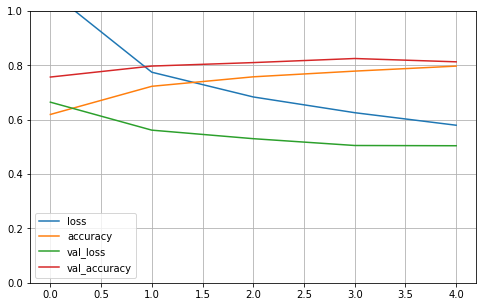

In [76]:
# 可视化学习曲线
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
# 如果一个学习曲线刚开始平滑,后期开始变化有两个原因
# 1. 参数众多，训练不充分
# 2. 梯度消失 -> 链式法则 -> 复合函数f(g(x))
plot_learning_curves(history)

## 超参数搜索

In [0]:
"""使用Sklearn进行超参数搜索"""
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.datasets import fetch_california_housing
# 加载数据
tf.keras.backend.clear_session()
housing = fetch_california_housing()
x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)
# RandomizedSearchCV 步骤:
# 1. 转化为sklearn的model
# 2. 定义参数集合
# 3. 搜索参数
tf.keras.backend.clear_session()
def build_model(hidden_layers = 1,layer_size = 30,learning_rate = 3e-3):
    model = keras.models.Sequential()
    # 增加几个由layer_size = 30的Dense layer
    model.add(keras.layers.Dense(layer_size, activation='relu',
                                 input_shape=x_train.shape[1:]))
    # 利用for循环增加hidden_layers
    for _ in range(hidden_layers - 1):
        model.add(keras.layers.Dense(layer_size,activation = 'relu'))
    # 输出层级
    model.add(keras.layers.Dense(1))
    # 定义learning_rate
    optimizer = keras.optimizers.SGD(learning_rate)
    # 使用learning_rate optimizer
    model.compile(loss = 'mse', optimizer = optimizer)
    return model
# tf.keras.wrappers.scikit_learn.KerasRegressor
# 将tf模型转成sk模型, 将tf模型传进build_fn
sklearn_model = KerasRegressor(build_fn = build_model)
# 设置callbacks
callbacks = [keras.callbacks.EarlyStopping(patience=2, min_delta=0.1)]

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal
# 构建搜索参数
param_distribution = {
    "hidden_layers":[1, 2],
    "layer_size": [50],
    # f(x) = 1/(x*log(b/a)) a <= x <= b
    "learning_rate": [1e-3],
}
# 使用sklearn中的RandomizedSearchCV或者GridSearchCV
random_search_cv = GridSearchCV(sklearn_model,
                                param_distribution,
                                cv = 3)
random_search_cv.fit(x_train_scaled, y_train, epochs = 5,
                     batch_size=32, # 默认32
                     validation_data = (x_valid_scaled, y_valid),
                     callbacks = callbacks)

# cross_validation: 训练集分成n份，n-1训练，最后一份验证

Epoch 1/5
242/242 [==============================] - 0s 2ms/step - loss: 2.5328 - val_loss: 1.1933
Epoch 2/5
242/242 [==============================] - 0s 1ms/step - loss: 0.8638 - val_loss: 0.8008
Epoch 3/5
242/242 [==============================] - 0s 1ms/step - loss: 0.7044 - val_loss: 0.7226
Epoch 4/5
242/242 [==============================] - 0s 1ms/step - loss: 0.6593 - val_loss: 0.6842
Epoch 5/5
121/121 [==============================] - 0s 828us/step - loss: 0.5760
Epoch 1/5
242/242 [==============================] - 0s 2ms/step - loss: 2.3197 - val_loss: 1.0129
Epoch 2/5
242/242 [==============================] - 0s 1ms/step - loss: 0.8748 - val_loss: 0.7985
Epoch 3/5
242/242 [==============================] - 0s 1ms/step - loss: 0.7024 - val_loss: 0.7495
Epoch 4/5
121/121 [==============================] - 0s 807us/step - loss: 0.6654
Epoch 1/5
242/242 [==============================] - 0s 2ms/step - loss: 2.5453 - val_loss: 1.1859
Epoch 2/5
242/242 [=========================

GridSearchCV(cv=3, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f0dc3efdfd0>,
             iid='deprecated', n_jobs=None,
             param_grid={'hidden_layers': [1, 2], 'layer_size': [50],
                         'learning_rate': [0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [83]:
print(random_search_cv.best_params_)
print(random_search_cv.best_score_)
print(random_search_cv.best_estimator_)

{'hidden_layers': 2, 'layer_size': 50, 'learning_rate': 0.001}
-0.6013521552085876


In [84]:
model = random_search_cv.best_estimator_.model
model.evaluate(x_test_scaled, y_test)

162/162 [==============================] - 0s 852us/step - loss: 0.5905


0.5905142426490784